### KNN - K Nearest Neighbours

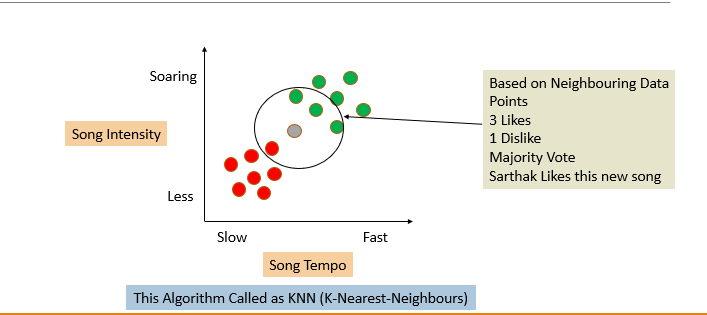

In [35]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [1]:
import pandas as pd
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


#### Target - Drug
### Step 2 - Perform Basic Data Quality Check

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Separate X and Y (Drug)

In [5]:
X = df.drop(columns=["Drug"])
Y = df[["Drug"]]

In [6]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [7]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


<Axes: xlabel='Drug'>

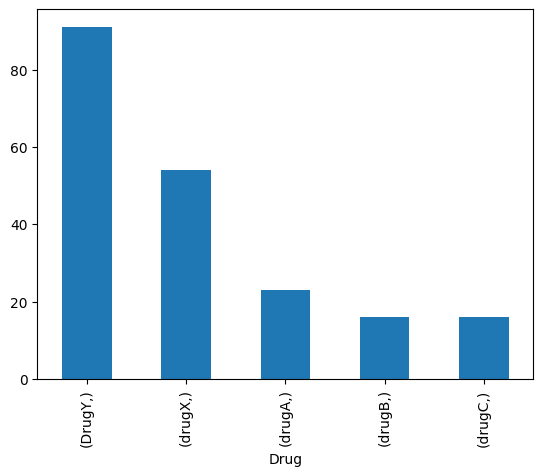

In [8]:
Y.value_counts().plot(kind="bar")

### Step 4 - Apply Preprocessing on X

In [9]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [10]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [11]:
cat

['Sex', 'BP', 'Cholesterol']

In [12]:
con

['Age', 'Na_to_K']

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = make_pipeline(
   SimpleImputer(strategy="mean"),
   StandardScaler()
)

In [19]:
cat_pipe = make_pipeline(
   SimpleImputer(strategy="most_frequent"),
   OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [20]:
pre = ColumnTransformer(
   [
      ("num", num_pipe, con),
      ("cat", cat_pipe, cat)
   ]
).set_output(transform="pandas")

In [21]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,0.0,0.0,0.0,0.0
1,0.162699,-0.415145,1.0,1.0,0.0,0.0
2,0.162699,-0.828558,1.0,1.0,0.0,0.0
3,-0.988614,-1.149963,0.0,0.0,1.0,0.0
4,1.011034,0.271794,0.0,1.0,0.0,0.0


### Step 5 - Apply Train Test Split
test_size = 0.4

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.4, random_state=21)

In [24]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
164,-1.715759,0.405574,1.0,0.0,0.0,1.0
68,0.586866,1.189795,1.0,0.0,1.0,0.0
97,0.708057,1.292073,0.0,0.0,0.0,0.0
10,0.162699,-0.599162,0.0,1.0,0.0,0.0
189,1.192821,0.672717,1.0,0.0,0.0,1.0


In [25]:
ytrain.head()

,Drug
164,DrugY
68,DrugY
97,DrugY
10,drugC
189,DrugY


In [26]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
144,-0.322065,-0.891007,1.0,0.0,0.0,0.0
9,-0.079683,0.455672,1.0,1.0,0.0,1.0
17,-0.079683,-0.293162,1.0,0.0,0.0,0.0
20,0.768653,0.422366,1.0,1.0,0.0,1.0
45,1.314011,-1.107081,0.0,0.0,1.0,1.0


In [27]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


### Step 6 - Model Building
### 6.1. KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=51)

model1.fit(xtrain, ytrain)

c:\Machine Learning\repository\venv\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=51)

In [29]:
model1.score(xtrain, ytrain)

0.65

In [30]:
model1.score(xtest, ytest)

0.55

### Hyperparameter tuning for KNN

In [31]:
params = {"n_neighbors":[6,7,8,9,10,11,12]}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
model_knn = KNeighborsClassifier()


In [36]:
rscv = RandomizedSearchCV(model_knn, param_distributions=params, cv=5, scoring="f1_macro", n_jobs=-1)

rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [6, 7, 8, 9, 10, 11,
                                                        12]},
                   scoring='f1_macro')

In [37]:
rscv.best_params_

{'n_neighbors': 8}

In [38]:
rscv.best_score_

np.float64(0.8295562987736901)

In [39]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=8)

### Model Evaluation KNN

In [40]:
ypred_test = best_knn.predict(xtest)

In [41]:
ypred_test[0:5]

array(['drugA', 'DrugY', 'drugA', 'DrugY', 'drugX'], dtype=object)

In [42]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


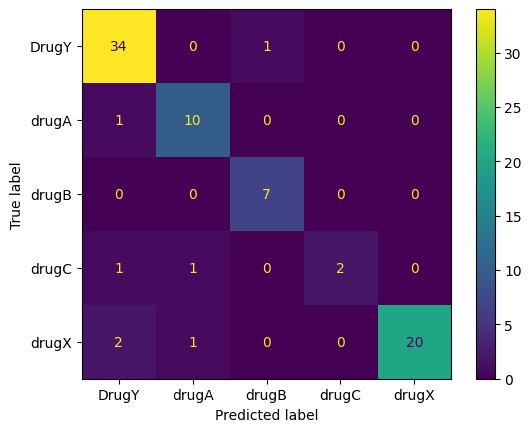

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_knn, xtest, ytest)

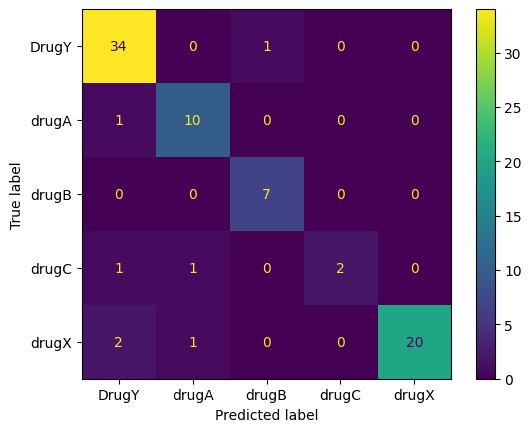

In [45]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

       DrugY       0.89      0.97      0.93        35
       drugA       0.83      0.91      0.87        11
       drugB       0.88      1.00      0.93         7
       drugC       1.00      0.50      0.67         4
       drugX       1.00      0.87      0.93        23

    accuracy                           0.91        80
   macro avg       0.92      0.85      0.87        80
weighted avg       0.92      0.91      0.91        80



#### Clearly from above, the model is good because f1-score (f1 macro) = 0.87 > 0.80

### SVN

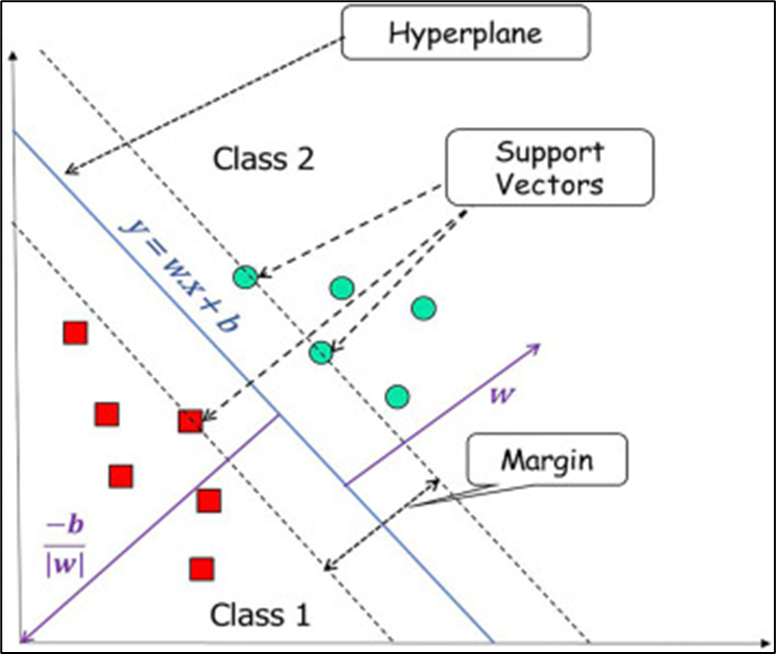

In [47]:
from sklearn.svm import SVC

In [48]:
model_svm = SVC(probability=True)
model_svm.fit(xtrain, ytrain)

SVC(probability=True)

In [49]:
model_svm.score(xtrain, ytrain)

0.9916666666666667

In [50]:
model_svm.score(xtest, ytest)

0.925

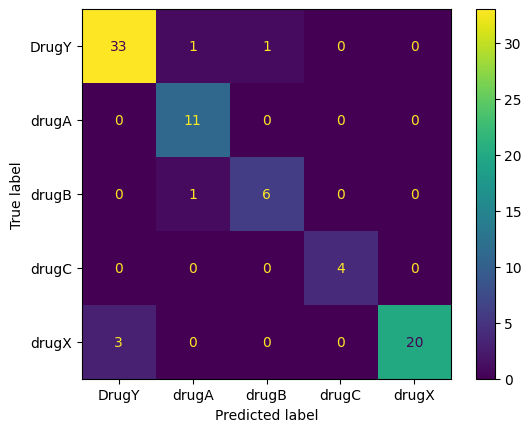

In [51]:
ConfusionMatrixDisplay.from_estimator(model_svm, xtest, ytest)

In [52]:
ypred_test2 = model_svm.predict(xtest)
ypred_test2[0:5]

array(['drugA', 'DrugY', 'drugA', 'DrugY', 'drugX'], dtype=object)

In [53]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


In [54]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

       DrugY       0.92      0.94      0.93        35
       drugA       0.85      1.00      0.92        11
       drugB       0.86      0.86      0.86         7
       drugC       1.00      1.00      1.00         4
       drugX       1.00      0.87      0.93        23

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.93        80
weighted avg       0.93      0.93      0.93        80



In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
scores = cross_val_score(model_svm, xtrain, ytrain, cv=5, scoring="f1_macro")
scores

array([0.95130435, 0.97312253, 0.95130435, 1.        , 1.        ])

In [57]:
scores.mean()

np.float64(0.9751462450592886)

#### From above results SVM is better model for given data because f1_macro = 0.93

### Step 8 - Out of Sample Prediction

In [61]:
xnew = pd.read_csv("drugtest.csv")
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,37.0,F,HIGH,HIGH,13.091
1,NaN,F,HIGH,HIGH,12.894
2,23.0,M,NaN,HIGH,31.686
3,31.0,M,HIGH,HIGH,30.366
4,39.0,M,HIGH,HIGH,9.664


In [62]:
xnew.isna().sum()

Age            3
Sex            0
BP             2
Cholesterol    3
Na_to_K        6
dtype: int64

In [60]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [64]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-0.443255,-0.415423,0.0,0.0,0.0,0.0
1,0.000000,-0.442762,0.0,0.0,0.0,0.0
2,-1.291591,2.165111,1.0,0.0,0.0,0.0
3,-0.806828,1.981927,1.0,0.0,0.0,0.0
4,-0.322065,-0.891007,1.0,0.0,0.0,0.0
5,-1.715759,-0.565995,1.0,1.0,0.0,0.0
6,-0.685637,0.000000,0.0,1.0,0.0,0.0
7,0.889843,0.000000,1.0,0.0,0.0,0.0
8,1.435202,-0.803995,1.0,1.0,0.0,0.0
9,-0.867423,-0.782901,0.0,0.0,1.0,0.0


In [65]:
preds = model_svm.predict(xnew_pre)
preds[0:5]

array(['drugA', 'drugA', 'DrugY', 'DrugY', 'drugA'], dtype=object)

In [66]:
model_svm.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [67]:
probs = model_svm.predict_proba(xnew_pre)
probs[0:5]

array([[0.04336596, 0.87163927, 0.02532839, 0.03766547, 0.0220009 ],
       [0.07800614, 0.70602767, 0.11814253, 0.05954233, 0.03828133],
       [0.96789331, 0.00466184, 0.00857182, 0.00819831, 0.01067472],
       [0.98456132, 0.00253196, 0.00483597, 0.00405204, 0.00401871],
       [0.00743325, 0.9379208 , 0.01426654, 0.02863253, 0.01174689]])

### Save the result in reults.csv

In [68]:
xnew["Drug"] = preds
xnew[model_svm.classes_] = probs

In [69]:
xnew = xnew.round(4)

In [70]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,DrugY,drugA,drugB,drugC,drugX
0,37.0,F,HIGH,HIGH,13.091,drugA,0.0434,0.8716,0.0253,0.0377,0.0220
1,NaN,F,HIGH,HIGH,12.894,drugA,0.0780,0.7060,0.1181,0.0595,0.0383
2,23.0,M,NaN,HIGH,31.686,DrugY,0.9679,0.0047,0.0086,0.0082,0.0107
3,31.0,M,HIGH,HIGH,30.366,DrugY,0.9846,0.0025,0.0048,0.0041,0.0040
4,39.0,M,HIGH,HIGH,9.664,drugA,0.0074,0.9379,0.0143,0.0286,0.0117
5,16.0,M,LOW,HIGH,12.006,drugC,0.0759,0.0378,0.0114,0.8267,0.0482
6,33.0,F,LOW,HIGH,NaN,DrugY,0.6023,0.0537,0.0107,0.2949,0.0384
7,59.0,M,HIGH,HIGH,NaN,DrugY,0.7128,0.0422,0.2146,0.0183,0.0121
8,68.0,M,LOW,HIGH,10.291,drugC,0.0381,0.0159,0.0563,0.7992,0.0905
9,30.0,F,NORMAL,HIGH,10.443,drugX,0.0171,0.0286,0.0052,0.0156,0.9335


In [71]:
xnew.to_csv("SVMResults.csv", index=False)

### Save the pre and model

In [72]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [73]:
joblib.dump(model_svm,"svm_model.joblib")

['svm_model.joblib']

### Load the objects from file

In [74]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [75]:
m = joblib.load("svm_model.joblib")
m

SVC(probability=True)